# **1. Setting up the environment**

### **1.1 Installing required libraries**

In [49]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 tensorflow-datasets matplotlib ipywidgets

### **1.2 Setting memory growth to all the gpus available**

In [50]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

### **1.3 Loading the data set**

In [51]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

df = tfds.load('fashion_mnist', split='train')

In [52]:
import numpy as np
dataiterator = df.as_numpy_iterator()

# **2. Visualizing the dataset using matplotlib**

### **2.1 Ploting the graph to view images**

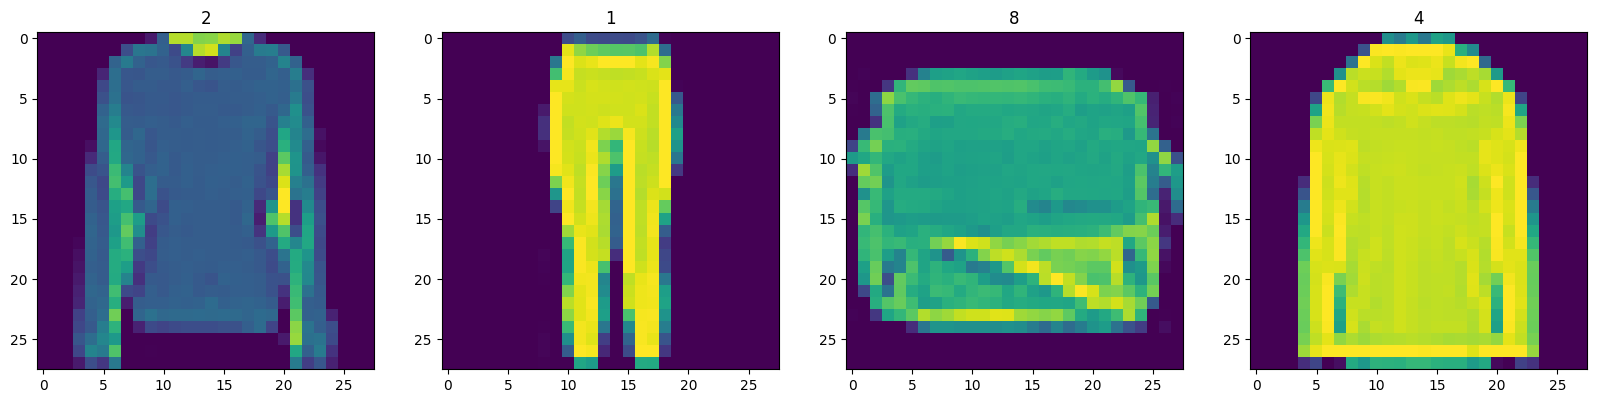

In [53]:
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx in range(4):
  batch = dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text((batch['label']))

In [54]:
def scale_images(data):
  image = data['image']
  return image/255

### **2.2 Applying `MCSBP` rule**
*   **M = MAP**
*   **C = CACHE**
*   **S = SHUFFLE**
*   **B = BATCH**
*   **P = PREFETCH**



In [55]:
 df = tfds.load('fashion_mnist', split='train')
 df = df.map(scale_images)
 df = df.cache()
 df = df.shuffle(60000)
 df = df.batch(128)
 df = df.prefetch(64)

In [56]:
df.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# **3. Building Neural Network**

### **3.1 importing modelling components**

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### **3.2 Build Generator**

In [58]:
def generatorLayer():
  model = Sequential()

  # takes in random values and reshapes it into 7*7*128
  # beginning of the generator
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  for i in range(2):
    # upsampling block
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

  for j in range(2):
    # Convolution block
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

  # Covolution layer to get to one channel
  model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

  return model

In [61]:
generator = generatorLayer()
generator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_9 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_9 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [66]:
img = generator.predict(np.random.rand(4, 128, 1))

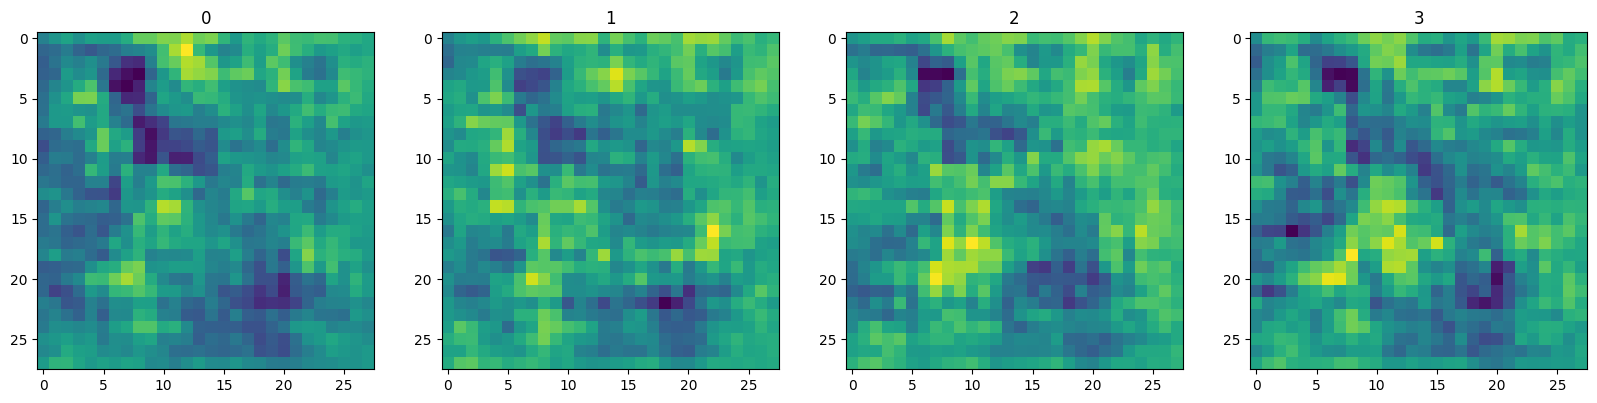

In [67]:
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx, img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

### **3.3 Build Discriminator**

In [76]:
def discriminatorLayer():
  model = Sequential()

  # First Conv block
  model.add(Conv2D(32, 5, input_shape=(28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fourth Conv block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [77]:
discriminator = discriminatorLayer()
discriminator.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_10 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 128)     

# **4. Training**

### **4.1 Losses and Optimizers**

In [78]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [79]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### **4.2 Subclasses Model**

In [81]:
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    pass
  def compile(self):
    pass
  def train(self):
    pass